# **Projecto 6. Recopilación y almacenamiento de datos. Chicago Taxis.**

En este proyecto se contínua con el análisis de los datos de los viajes en Taxi en el área de Chicago que se estudió en la plataforma. Se llevará acabo un análisis exploratorio de datos para los primeros dos datasets a continuación, los cuales también mostraremos más a detalle en la sección correspondiente:

* **`chicago_trips`:** Este primer dataset contiene 2 columnas: `company_name`: nombre de la empresa de taxis y `trips_amount`: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

* **`chicago_dropoffs`:** Contiene dos columnas también: `dropoff_location_name`: barrios de Chicago donde finalizaron los viajes, y  `average_trips`: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

Hasta aquí llevaremos a cabo:
1. importar los archivos
2. estudiar los datos que contienen
3. convertir a los tipos de datos sean correctos
4. identificar los 10 principales barrios en términos de finalización del recorrido
5. Crear gráficos para las empresas de taxis y su número de viajes, los 10 barrios principales por número de finalizaciones (dropoffs)
6. Y sacar conclusiones basadas en cada gráfico y explicar los resultados

Posteriormente con el resultado de la consulta anterior o tercer dataset, llevaremos a cabo una prueba de hipótesis que explicaremos más a detalle en la sección correspondiente.

* **`loop_to_ord`:** Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare (ORD). Contiene 3 columnas: `start_ts`: fecha y hora de la recogida, `weather_conditions`: condiciones climáticas en el momento en el que comenzó el viaje, y`duration_seconds`: duración del viaje en segundos.

# Paso 4. Análisis Exploratorio de Datos

## Importación de datos

In [ ]:
import pandas   as pd
from scipy import stats as st
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
chicago_trips = pd.read_csv('https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_01.csv')
chicago_dropoffs = pd.read_csv('https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_04.csv')
loop_to_ord = pd.read_csv('https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_07.csv')

## 1. Chicago Trips

In [ ]:
chicago_trips.info() # Aquí podemos ver que los tipos de datos están correctos para cada columna y no hace falta cambiarlos, tampoco tenemos datos faltantes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


<AxesSubplot:xlabel='company_name', ylabel='trips_amount'>

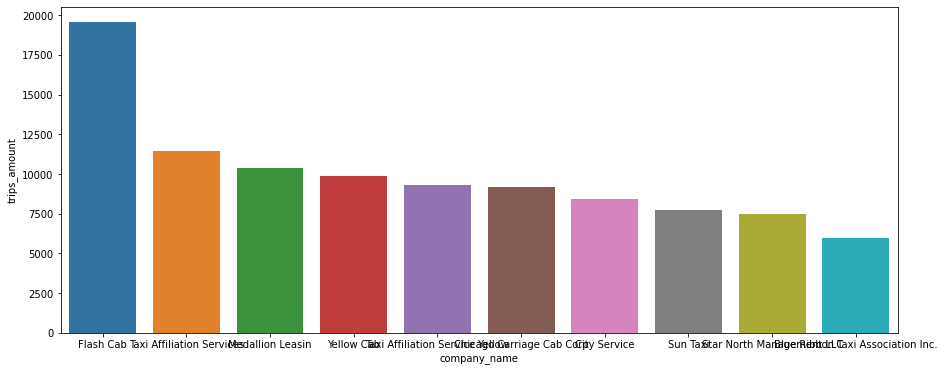

In [ ]:
chicago_top_trips = chicago_trips.sort_values(by='trips_amount', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=chicago_top_trips, x="company_name", y="trips_amount")

In [ ]:
chicago_top_trips.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


Encontramos las 10 empresas de taxis más populares en Chicago de acuerdo con el número de viajes realizados. Con esta gráfica podemos observar que Flash Cab es la empresa con mayor número de viajes en el área de Chicago, superando por mucho a las demás empresas con **19558** viajes, eso es 58% más que la segunda empresa más popular (Taxi Affiliation Services), y representa el 14% del total de viajes en la ciudad.

## 2. Chicago Dropoffs

In [ ]:
chicago_dropoffs.info()
chicago_dropoffs['average_trips'] = chicago_dropoffs['average_trips'].apply(np.int64) # Aquí también los datos están completos y del tipo correcto.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
chicago_top_dropoffs = chicago_dropoffs.sort_values(by='average_trips', ascending=False).head(10)
chicago_top_dropoffs

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


<AxesSubplot:xlabel='dropoff_location_name', ylabel='average_trips'>

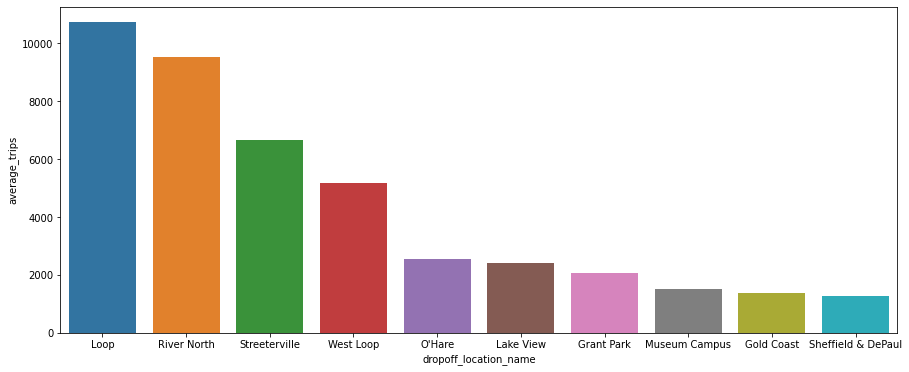

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=chicago_top_dropoffs, x="dropoff_location_name", y="average_trips")

Ahora en esta sección encontramos las 10 locaciones destino más populares de acuerdo con el número promedio de viajes que se realizan de algún otro punto de la ciudad a la locación. Podemos ver que Loop, River North, Streeterville y West Loop son las 4 más destacadas de las 94 locaciones recopiladas. Loop como destino de viajes en taxi cuenta con **10727** de ellos, lo que representa el 24% del total de viajes que finalizan allí.

# Paso 5. Prueba de Hipótesis

Es entendible que Loop sea la zona con mayor cantidad de dropoffs en Chicago ya que esta zona es la más popular o el 'downtown' de la ciudad. Ahora vamos a realizar una prueba de hipótesis para verificar si la duración promedio de los viajes cambia de acuerdo con el estado del tiempo.

## 3. Loop to O'Hare Airport (ORD)

In [ ]:
loop_to_ord['start_ts'] = pd.to_datetime(loop_to_ord['start_ts'], format='%Y.%m.%d %H:%M:%S')
# Aquí convertimos `start_ts` a datetime, estaba almacenado como string.
loop_to_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [ ]:
loop_to_ord.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [ ]:
loop_to_ord['weekday'] = loop_to_ord['start_ts'].dt.weekday
loop_to_ord['weekday'].value_counts()

5    1068
Name: weekday, dtype: int64

## Testing

Comenzaremos con prueba de Levene para determinar el valor que otorgaremos a la variable *de equal_var*.  En caso de rechazar la hipótesis nula éste tendra un valor *False*, pero si No rechazamos la hipótesis nula el valor será *True* y podrmeos proceder a la prueba de T para detemrinar si la duración promedio de los vijaes cambia de acuerdo con el estado del tiempo en Chicago para los viajes de The Loop al aeropuerto ORD.

* H0 = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.
* H1 = La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.



In [ ]:
good_days = loop_to_ord.query('weather_conditions == "Good"')['duration_seconds']
bad_days = loop_to_ord.query('weather_conditions == "Bad"')['duration_seconds']

In [ ]:
results = st.levene(good_days, bad_days, center='mean')
alpha= 0.05
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.3968505113995001
No rechazamos la hipótesis nula


In [ ]:
results = st.ttest_ind(good_days, bad_days, equal_var=True)
alpha= 0.05
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 6.517970327099473e-12
Rechazamos la hipótesis nula


Separamos los días lluviosos (*bad*) de los días soleados (*good*), determinamos el valor de *equal_var* y procedimos a realizar la prueba de T con un valor *True*. El resultado de la prueba de T nos arrojó un *p.value* mayor a alpha (0.05) por lo cual rechazamos la hipótesis nula en la prueba de T. Con este resultado llegamos a la conclusión de que la duración promedio de los viajes de The Loop a el aeropuerto O'Hare sí cambia los sábados lluviosos.

# Conclusión

* Al comenzar con este análisis no fue necesario imputar o rechazar los datos con los que comenzamos ya que el dataframe utilizado es el resultado de una consulta anterior lo cual hizó más rápido llegar a el análisis de los datos y la prueba de hipótesis.
* Encontramos también durante el análisis la empresa con más viajes realizados en el área de Chicago, ésta fue Flash Cab Taxi con 14% del total de viajes en la ciudad a su nombre ante las otras 9 empresas de Taxis que fueron analizadas.
*   Encontramos también que The Loop es el área de la ciudad en la que más dropoffs se realizan, muchas personas toman viajes de algún otro punto de la ciudad a The Loop (downtown) en comparación con las demás zonas de la ciudad que analizamos, con 24% del total.
*   Realizando un análisis en el que tomamos en cuenta el estado del tiempo desde The Loop o el aeropuerto (ORD) y con una prueba de T, llegamos a la conclusión de que los sábados lluviosos la duración del viaje cambia significativamente. Podemos pensar que aumenta debido a que hay más tráfico y que tal vez hay menos personas a pie o en transporte público por la misma razón.



